Lasso Regression:

    Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
    Minimization objective = LS Obj + α * (sum of absolute value of coefficients)


In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../Data/2014outagesJerry.csv")

In [3]:
data.head()

,Date,Total_outages,Equipment,Trees,Animals,Lightning,Others,Day_length_hr,Max_temp_F,Avg_Temp_F,...,Max_windspeed_mph,Avg_windspeed_mph,Max_windgust_mph,Precipitation_in,Events,Event_fog,Event_rain,Event_snow,Event_thunderstorm,Event_Hail
0,1/1/14,0,0,0,0,0,0,8.529,45,42,...,8,3,9,0.01,Fog,1,0,0,0,0
1,1/2/14,0,0,0,0,0,0,8.547,51,47,...,21,7,26,0.00,NaN,0,0,0,0,0
2,1/3/14,1,1,0,0,0,0,8.566,48,43,...,14,6,16,0.00,Fog,1,0,0,0,0
3,1/4/14,0,0,0,0,0,0,8.586,46,40,...,10,6,13,0.00,NaN,0,0,0,0,0
4,1/5/14,4,4,0,0,0,0,8.608,47,39,...,15,8,17,0.00,NaN,0,0,0,0,0


## Total Outages

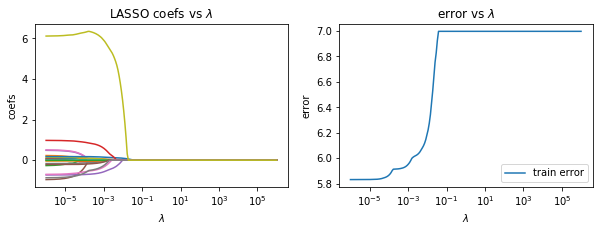

In [4]:
# Select input/output data
Y_tot = data['Total_outages']
X_tot = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_lasso = linear_model.Lasso()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_lasso.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_lasso.fit(X_tot,Y_tot)
    coefs.append(regr_lasso.coef_)
    trainerror.append(mean_squared_error(Y_tot,regr_lasso.predict(X_tot)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('LASSO coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

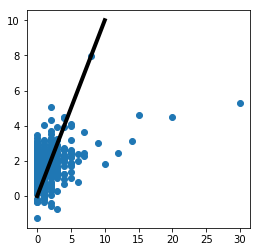

Train error 5.86579063557
R^2 0.161759356773


In [5]:
# pick the best alpha value
regr_lasso_best_tot = linear_model.Lasso()
regr_lasso_best_tot.set_params(alpha=1e-4,normalize=True,max_iter=1e6)
regr_lasso_best_tot.fit(X_tot,Y_tot)
Y_tot_predict = regr_lasso_best_tot.predict(X_tot)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_tot,Y_tot_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_tot,Y_tot_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_lasso_best_tot.score(X_tot,Y_tot))

## Equipment-caused Outages

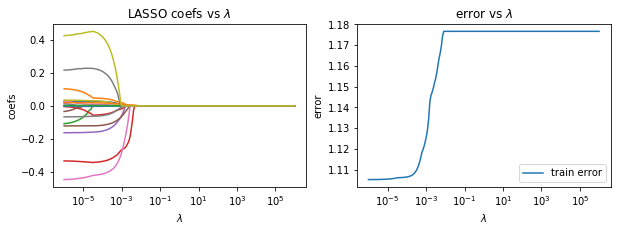

In [6]:
# Select input/output data
Y_eqp = data['Equipment']
X_eqp = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_lasso = linear_model.Lasso()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_lasso.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_lasso.fit(X_eqp,Y_eqp)
    coefs.append(regr_lasso.coef_)
    trainerror.append(mean_squared_error(Y_eqp,regr_lasso.predict(X_eqp)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('LASSO coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

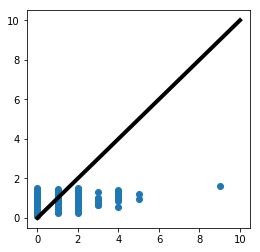

Train error 1.10641883806
R^2 0.0596682123769


In [7]:
# pick the best alpha value
regr_lasso_best_eqp = linear_model.Lasso()
regr_lasso_best_eqp.set_params(alpha=1e-4,normalize=True,max_iter=1e6)
regr_lasso_best_eqp.fit(X_eqp,Y_eqp)
Y_eqp_predict = regr_lasso_best_eqp.predict(X_eqp)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_eqp,Y_eqp_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_eqp,Y_eqp_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_lasso_best_eqp.score(X_eqp,Y_eqp))

## Trees-caused Outages

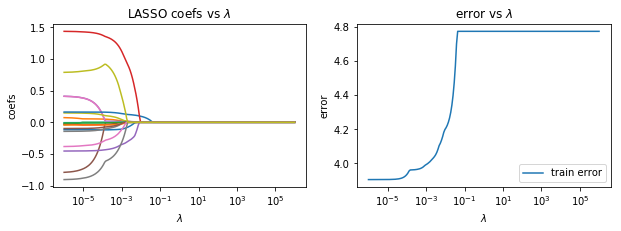

In [8]:
# Select input/output data
Y_tree = data['Trees']
#X_tree = data[['Max_temp_F','Max_humidity_percent','Min_visibility_mi','Max_windspeed_mph','Precipitation_in','Event_Hail']]
X_tree = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_lasso = linear_model.Lasso()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_lasso.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_lasso.fit(X_tree,Y_tree)
    coefs.append(regr_lasso.coef_)
    trainerror.append(mean_squared_error(Y_tree,regr_lasso.predict(X_tree)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('LASSO coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

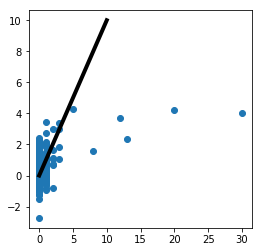

Train error 3.90574174556
R^2 0.181779458487


In [9]:
# pick the best alpha value
regr_lasso_best_tree = linear_model.Lasso()
regr_lasso_best_tree.set_params(alpha=1e-5,normalize=True,max_iter=1e6)
regr_lasso_best_tree.fit(X_tree,Y_tree)
Y_tree_predict = regr_lasso_best_tree.predict(X_tree)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_tree,Y_tree_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_tree,Y_tree_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_lasso_best_tree.score(X_tree,Y_tree))

## Animals-caused Outages

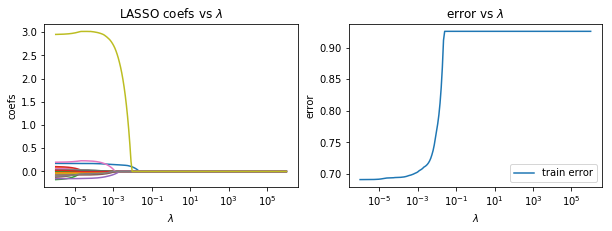

In [10]:
# Select input/output data
Y_ani = data['Animals']
X_ani = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_lasso = linear_model.Lasso()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_lasso.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_lasso.fit(X_ani,Y_ani)
    coefs.append(regr_lasso.coef_)
    trainerror.append(mean_squared_error(Y_ani,regr_lasso.predict(X_ani)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('LASSO coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

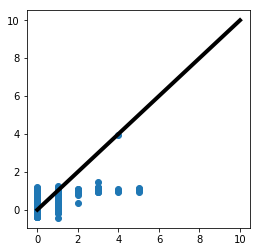

Train error 0.694591983128
R^2 0.249618740251


In [11]:
# pick the best alpha value
regr_lasso_best_ani = linear_model.Lasso()
regr_lasso_best_ani.set_params(alpha=1e-4,normalize=True,max_iter=1e6)
regr_lasso_best_ani.fit(X_ani,Y_ani)
Y_ani_predict = regr_lasso_best_ani.predict(X_ani)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_ani,Y_ani_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_ani,Y_ani_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_lasso_best_ani.score(X_ani,Y_ani))

## Lightning-caused Outages

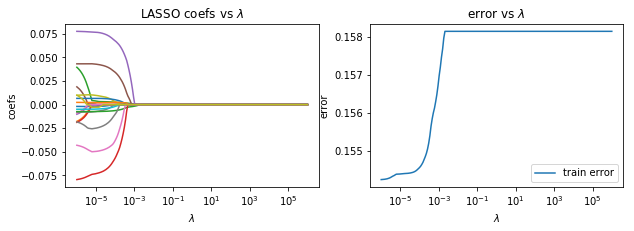

In [12]:
# Select input/output data
Y_lightening = data['Lightning']
X_lightening = data[['Day_length_hr','Max_temp_F','Avg_Temp_F','Min_temp_F','Max_humidity_percent','Avg_humidity_percent','Min_humidity_percent','Max_visibility_mi','Avg_visibility_mi','Min_visibility_mi','Max_windspeed_mph','Avg_windspeed_mph','Max_windgust_mph','Precipitation_in','Event_fog','Event_rain','Event_snow','Event_thunderstorm','Event_Hail']]

# Initialize lists
coefs = []
trainerror = []

# Define lambda space
lambdas = np.logspace(-6,6,200)

# Define type of regressor
regr_lasso = linear_model.Lasso()

# loop over lambda (a) values (strength of regularization)
for a in lambdas:
    regr_lasso.set_params(alpha=a,normalize=True,max_iter=1e6)
    regr_lasso.fit(X_lightening,Y_lightening)
    coefs.append(regr_lasso.coef_)
    trainerror.append(mean_squared_error(Y_lightening,regr_lasso.predict(X_lightening)))

# Plot
plt.figure(figsize=(10,3))

# figure 1: Lasso Coef. and lambda
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('LASSO coefs vs $\lambda$')

# figure 2: Error and lambda
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc='lower right')
plt.title('error vs $\lambda$')

plt.show()

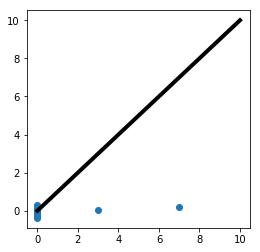

Train error 0.154396352857
R^2 0.0237563308299


In [13]:
# pick the best alpha value
regr_lasso_best_lightening = linear_model.Lasso()
regr_lasso_best_lightening.set_params(alpha=1e-5,normalize=True,max_iter=1e6)
regr_lasso_best_lightening.fit(X_lightening,Y_lightening)
Y_lightening_predict = regr_lasso_best_lightening.predict(X_lightening)

#make parity plot 
plt.figure(figsize=(4,4))
plt.scatter(Y_lightening,Y_lightening_predict)
plt.plot([0,10],[0,10],lw=4,color='black')
plt.show()

#calculate the test and train error
print("Train error",mean_squared_error(Y_lightening,Y_lightening_predict))

# Returns the coefficient of determination R^2 of the prediction.
print("R^2",regr_lasso_best_lightening.score(X_lightening,Y_lightening))